# Analysing and Cleaning

This is a preliminary rough undertaking to analyse and understand which googleplaystore apps earn revenue and which attributes define success. We have a dataset of 10841 apps of all languages.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#Reading file
googleplay = pd.read_csv('E:\Imps\PlayStore\googleplaystore.csv')
googleplay_reviews = pd.read_csv('E:\Imps\PlayStore\googleplaystore_user_reviews.csv')

The given googleplay dataset has the following features

In [15]:
googleplay.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [19]:
googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
googleplay.shape

(10841, 13)

In [34]:
googleplay.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Googleplay_user_reviews contains the following data

In [28]:
googleplay_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [32]:
googleplay_reviews.shape

(64295, 5)

# Plotting Relations

Plotting various attribute realations to better understand the given dataset

In [41]:
googleplay.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

Obtaining the ratio of free apps to that of total apps in playstore

In [59]:
count_Free = 0
count_Paid = 0
count_Na = 0

for i in googleplay["Type"]:
    if i == "Free":
        count_Free += 1
    elif i == "Paid":
        count_Paid += 1
    else:
        count_Na +=1

print("Free AppRatio = "+ str(count_Free/len(googleplay.loc[: , "Type"])))

print("Paid AppRatio = "+ str(count_Paid/len(googleplay.loc[: , "Type"])))

print("Missing values = "+ str(count_Na))

Free AppRatio = 0.9260215847246563
Paid AppRatio = 0.07379393044922056
Missing values = 2


In [76]:
Type_list = list(googleplay.loc[:,"Type"])

Type_list = list(set(Type_list))
Type_list.remove("0")
Type_list

['Free', 'Paid', nan]


From the pieplot we can determine that most of the apps on the playstore are Free and use other sources of revenues such as in-app advertisements to earn revenue. 

Only about 7.4% of the apps are pay to install.

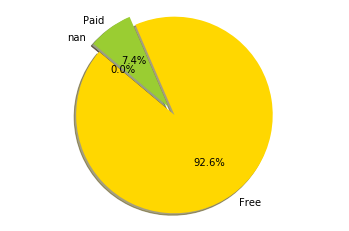

In [83]:
# Data to plot
labels = Type_list
sizes = [count_Free, count_Paid, count_Na]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [125]:
googleplay['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Number of distinct Categories of Apps

In [119]:
gh = googleplay.Genres.unique()
gh = list(gh)
gh1 = [i.split(';', 1)[0] for i in gh]
gh1.remove("February 11, 2018")
gh1 = set(gh1)
gh1

{'Action',
 'Adventure',
 'Arcade',
 'Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Board',
 'Books & Reference',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Educational',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photography',
 'Productivity',
 'Puzzle',
 'Racing',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social',
 'Sports',
 'Strategy',
 'Tools',
 'Travel & Local',
 'Trivia',
 'Video Players & Editors',
 'Weather',
 'Word'}

In [120]:
print(len(gh1))

48


In [129]:
count_fam = 0
count_game = 0
count_tool = 0
count_med = 0
count_Others = 0

for i in googleplay["Category"]:
    if i == "FAMILY":
        count_fam += 1
    elif i == "GAME":
        count_game += 1
    elif i == "TOOLS":
        count_tool += 1
    elif i == "MEDICAL":
        count_med += 1
    else:
        count_Others += 1

print("Ratio of top three Categories to the total \t")
print("print(" = "+ str((count_fam + count_game + count_tool + count_med)/len(googleplay.loc[: , "Category"]))")

SyntaxError: invalid syntax (<ipython-input-129-80f3ad34f5df>, line 18)